In [1]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from kmodes.kprototypes import KPrototypes
from kmodes.kmodes import KModes
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder


In [2]:
df = pd.read_csv('psyco.csv')

In [3]:
df.head()

,age,gender,occupation,line_of_work,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time,like_hw,dislike_hw,prefer,certaindays_hw
0,19-25,Male,Student in College,NaN,7,5,0.5,3,3,0.0,0.0,0.5,1.0,-0.5,-0.5,100,1,Complete Physical Attendance,Yes
1,Dec-18,Male,Student in School,NaN,7,11,0.5,4,2,-0.5,0.5,-1.0,1.0,1.0,1.0,1111,1110,Complete Physical Attendance,No
2,19-25,Male,Student in College,NaN,7,7,1.5,2,2,1.0,0.0,0.5,0.5,0.5,0.5,1100,111,Complete Physical Attendance,Yes
3,19-25,Male,Student in College,NaN,7,7,1.5,3,1,0.0,1.0,0.5,0.0,-1.0,-0.5,100,1111,Complete Physical Attendance,Yes
4,19-25,Female,Student in College,NaN,7,7,1.5,2,2,0.0,0.0,0.0,0.0,0.5,0.0,1010,1000,Complete Physical Attendance,Yes


In [4]:
df.columns

Index(['age', 'gender', 'occupation', 'line_of_work', 'time_bp', 'time_dp',
       'travel_time', 'easeof_online', 'home_env', 'prod_inc', 'sleep_bal',
       'new_skill', 'fam_connect', 'relaxed', 'self_time', 'like_hw',
       'dislike_hw', 'prefer', 'certaindays_hw'],
      dtype='object')

In [5]:
#Replacing numerical values with categorical values
age_grp= {
   'Dec-18': 0,
   '19-25' : 1, 
   '26-32' : 2,
   '33-40' : 3,
   '40-50' : 4, 
   '50-60' : 5, 
   '60+'  : 6
}
df['Age Group'] = df['age'].replace(age_grp,inplace=True)

gender_grp = {
   'Male': 0,
   'Female' : 1,
   'Prefer not to say' : 2
}
df['Gender Group'] =df['gender'].replace(gender_grp,inplace=True)

occupation_grp = {
    'Working Professional' : 0,
    'Student in College' : 1,
    'Entrepreneur' : 2,
    'Homemaker' : 3,
    'Medical Professional aiding efforts against COVID-19' : 4,
    'Currently Out of Work' : 5 , 
    'Student in School' : 6,
    'Retired/Senior Citizen' : 7
}
df['Occupation Group'] = df['occupation'].replace(occupation_grp,inplace=True)

line_of_work_grp = {
    'Teaching' : 0,
    'Engineering' : 1,
    'Management' : 2,
    'Other'  : 3, 
    'Government Employee' :  4, 
    'Architect' : 5, 
    'APSPDCL ' : 6, 
    'Architecture' : 7  
}
df['Line of Work Group'] = df['line_of_work'].replace(line_of_work_grp,inplace=True)

prefer_grp = {
    'Complete Physical Attendance' : 0,
    'Work/study from home' : 1

}
df['Prefer Group'] = df['prefer'].replace(prefer_grp,inplace=True)

certaindays_hw_grp = {
    'Yes' : 0,
    'No' : 1,
    'Maybe' : 2
}
df['Certain days Group'] = df['certaindays_hw'].replace(certaindays_hw_grp,inplace=True)


In [6]:
#drop columns
columns_to_drop = ['Age Group', 'Gender Group', 'Occupation Group', 'Line of Work Group', 'Prefer Group', 'Certain days Group','line_of_work',"like_hw", "dislike_hw"]
df.drop(columns=columns_to_drop, inplace=True)


In [7]:
# Define categorical columns
categorical_columns = ["prod_inc", "sleep_bal", "new_skill", "fam_connect", "relaxed", "self_time"] 
                     

# Initialize LabelEncoder
LE = LabelEncoder()

# Apply label encoding to each categorical column
df[categorical_columns] = df[categorical_columns].apply(lambda col: LE.fit_transform(col))

# Initialise the k-means and fit it to the data:

#       k-means            
#######################################

In [8]:
#standardise the data 
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.values)
scaled_features_df = pd.DataFrame(scaled_features, index=df.index, columns=df.columns)
scaled_features_df.describe()

,age,gender,occupation,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time,prefer,certaindays_hw
count,1.175000e+03,1.175000e+03,1.175000e+03,1.175000e+03,1.175000e+03,1.175000e+03,1.175000e+03,1.175000e+03,1.175000e+03,1.175000e+03,1.175000e+03,1.175000e+03,1.175000e+03,1.175000e+03,1.175000e+03,1.175000e+03
mean,-9.675476e-17,6.047172e-18,-9.675476e-17,-3.023586e-18,1.209434e-17,-7.558965e-17,9.675476e-17,1.814152e-17,1.209434e-17,-4.233021e-17,-9.070758e-17,4.837738e-17,1.481557e-16,-1.103609e-16,1.814152e-17,3.477124e-17
std,1.000426e+00,1.000426e+00,1.000426e+00,1.000426e+00,1.000426e+00,1.000426e+00,1.000426e+00,1.000426e+00,1.000426e+00,1.000426e+00,1.000426e+00,1.000426e+00,1.000426e+00,1.000426e+00,1.000426e+00,1.000426e+00
min,-1.520578e+00,-8.886508e-01,-8.238262e-01,-1.703799e+00,-1.495519e+00,-7.400447e-01,-1.210365e+00,-1.418586e+00,-1.641023e+00,-1.434999e+00,-1.782386e+00,-1.835929e+00,-1.653567e+00,-2.001055e+00,-6.367907e-01,-9.311360e-01
25%,-9.248197e-01,-8.886508e-01,-8.238262e-01,-1.204929e+00,-1.118996e+00,-7.400447e-01,-1.210365e+00,-6.090480e-01,-8.277790e-01,-6.297825e-01,-1.005279e+00,-3.793344e-01,-8.553167e-01,-1.077189e+00,-6.367907e-01,-9.311360e-01
50%,-3.290614e-01,-8.886508e-01,-1.680025e-01,-2.071901e-01,3.870983e-01,-7.400447e-01,-4.211426e-01,2.004898e-01,-1.453458e-02,1.754345e-01,5.489351e-01,3.489628e-01,-5.706640e-02,-1.533225e-01,-6.367907e-01,2.777975e-01
75%,8.624552e-01,1.066714e+00,4.878212e-01,7.905491e-01,3.870983e-01,6.624593e-01,1.157303e+00,1.010028e+00,7.987098e-01,9.806515e-01,5.489351e-01,1.077260e+00,7.411839e-01,7.705436e-01,1.570375e+00,1.486731e+00
max,2.053972e+00,3.022078e+00,3.766940e+00,2.287158e+00,1.516669e+00,2.766215e+00,1.946525e+00,1.819565e+00,1.611954e+00,1.785868e+00,1.326042e+00,1.077260e+00,1.539434e+00,1.694410e+00,1.570375e+00,1.486731e+00


In [9]:
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(scaled_features_df)

/Users/manojkumarmohanta/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=2, random_state=0)

In [10]:
kmeans.cluster_centers_

array([[-0.13468932, -0.10806095, -0.14799727, -0.03251957, -0.28505121,
         0.01700988, -0.27355588, -0.24722542,  0.23677304,  0.36552551,
         0.51286248,  0.55083829,  0.53473984,  0.52058515,  0.15357357,
        -0.26734494],
       [ 0.24122505,  0.19353435,  0.26505924,  0.05824171,  0.51051927,
        -0.03046426,  0.48993143,  0.44277426, -0.42405433, -0.65464664,
        -0.91852329, -0.98653699, -0.95770507, -0.9323544 , -0.27504625,
         0.47880779]])

In [11]:
# Compute the silhouette score 
kmeans_silhouette = silhouette_score(scaled_features_df, kmeans.labels_).round(2)
kmeans_silhouette

0.19

In [12]:
pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


/Users/manojkumarmohanta/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/manojkumarmohanta/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/manojkumarmohanta/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/manojkumarmohanta/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: 

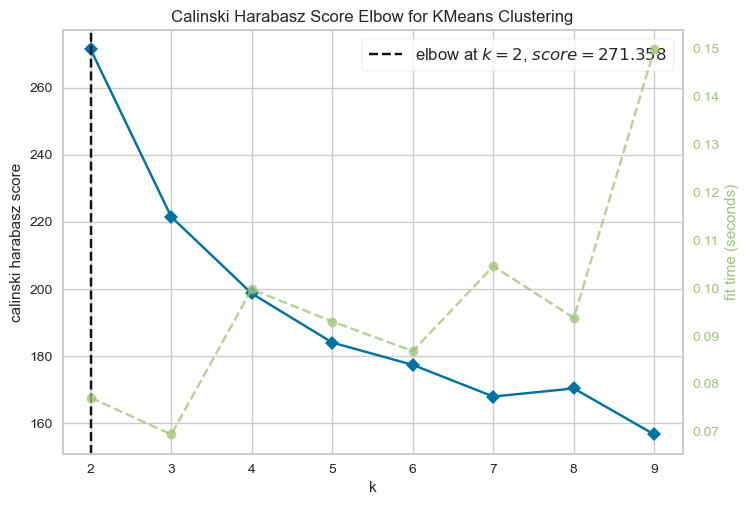

<Axes: title={'center': 'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [13]:
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,10), metric='calinski_harabasz')

visualizer.fit(scaled_features_df)        # Fit the data to the visualizer
visualizer.show()                            # Finalize and render the figure

/Users/manojkumarmohanta/anaconda3/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


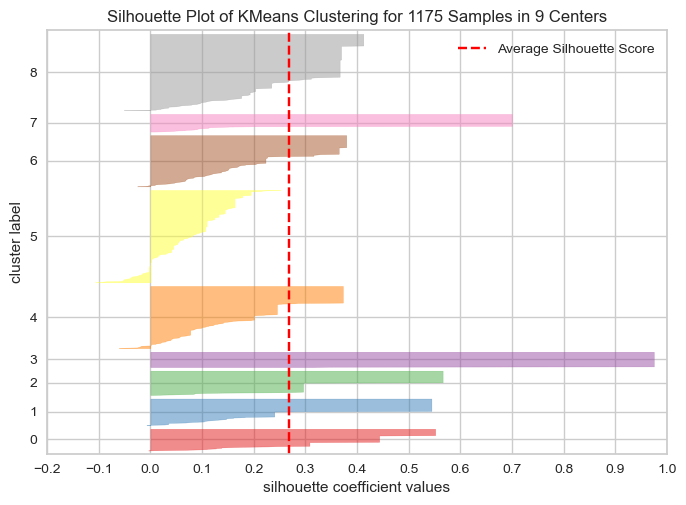

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 1175 Samples in 9 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [14]:
#SilhouetteVisualizer
visualizer = SilhouetteVisualizer(model)

visualizer.fit(scaled_features_df)    # Fit the data to the visualizer
visualizer.poof()    # Draw/show/poof the data

In [15]:
scaled_features_df.shape

(1175, 16)

In [16]:
scaled_features_df.head()

,age,gender,occupation,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time,prefer,certaindays_hw
0,-0.924820,-0.888651,-0.168002,-0.20719,-1.118996,-0.740045,0.368080,0.200490,-0.014535,0.175435,0.548935,1.077260,-0.855317,-1.077189,-0.636791,-0.931136
1,-1.520578,-0.888651,3.111116,-0.20719,1.140145,-0.740045,1.157303,-0.609048,-0.827779,0.980651,-1.782386,1.077260,1.539434,1.694410,-0.636791,0.277797
2,-0.924820,-0.888651,-0.168002,-0.20719,-0.365949,0.662459,-0.421143,-0.609048,1.611954,0.175435,0.548935,0.348963,0.741184,0.770544,-0.636791,-0.931136
3,-0.924820,-0.888651,-0.168002,-0.20719,-0.365949,0.662459,0.368080,-1.418586,-0.014535,1.785868,0.548935,-0.379334,-1.653567,-1.077189,-0.636791,-0.931136
4,-0.924820,1.066714,-0.168002,-0.20719,-0.365949,0.662459,-0.421143,-0.609048,-0.014535,0.175435,-0.228172,-0.379334,0.741184,-0.153322,-0.636791,-0.931136


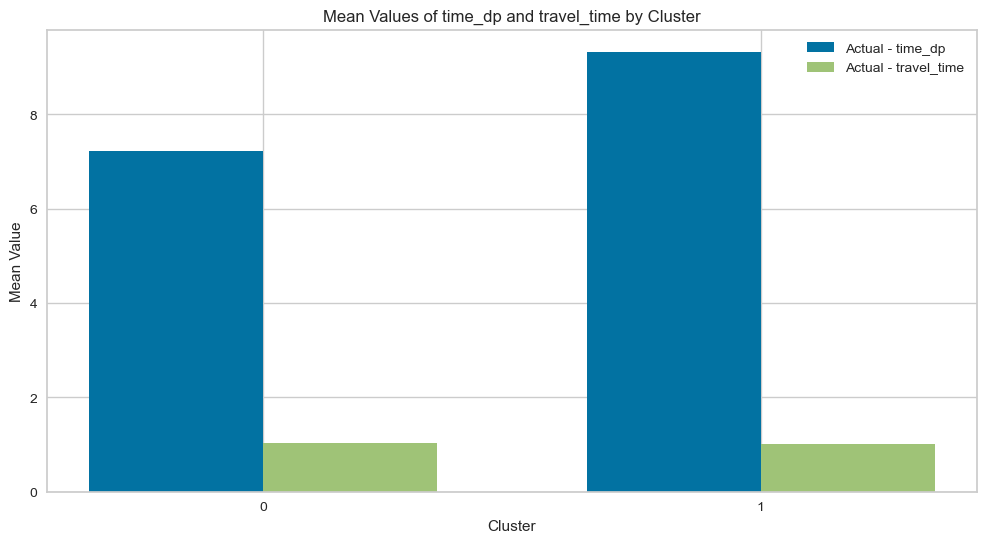

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'cluster' is the column representing the K-Means cluster labels
df['cluster'] = kmeans.labels_

# Group by the 'cluster' column and calculate the mean of 'time_dp' and 'travel_time' for each cluster
cluster_means = df.groupby('cluster')[['time_dp', 'travel_time']].mean()

# Plotting the bar groupby graph
fig, ax = plt.subplots(figsize=(12, 6))

# Bar width
bar_width = 0.35

# Get cluster labels
clusters = cluster_means.index

# Plot actual data
bar1 = ax.bar(clusters - bar_width / 2, cluster_means['time_dp'], bar_width, label='Actual - time_dp')
bar2 = ax.bar(clusters + bar_width / 2, cluster_means['travel_time'], bar_width, label='Actual - travel_time')

ax.set_xlabel('Cluster')
ax.set_ylabel('Mean Value')
ax.set_title('Mean Values of time_dp and travel_time by Cluster')
ax.set_xticks(clusters)
ax.legend()

plt.show()


In [18]:
kmeans.labels_

array([0, 0, 0, ..., 0, 1, 0], dtype=int32)

In [19]:
#append dataframe with cluster number
scaled_features_df['cluster'] = kmeans.labels_

In [20]:
kmeans.labels_ == 0

array([ True,  True,  True, ...,  True, False,  True])

In [21]:
#view proterties of each cluster
cluster1=scaled_features_df.query("cluster == 0")
cluster2=scaled_features_df.query("cluster == 1")


In [22]:
cluster1.head()

,age,gender,occupation,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time,prefer,certaindays_hw,cluster
0,-0.924820,-0.888651,-0.168002,-0.20719,-1.118996,-0.740045,0.368080,0.200490,-0.014535,0.175435,0.548935,1.077260,-0.855317,-1.077189,-0.636791,-0.931136,0
1,-1.520578,-0.888651,3.111116,-0.20719,1.140145,-0.740045,1.157303,-0.609048,-0.827779,0.980651,-1.782386,1.077260,1.539434,1.694410,-0.636791,0.277797,0
2,-0.924820,-0.888651,-0.168002,-0.20719,-0.365949,0.662459,-0.421143,-0.609048,1.611954,0.175435,0.548935,0.348963,0.741184,0.770544,-0.636791,-0.931136,0
3,-0.924820,-0.888651,-0.168002,-0.20719,-0.365949,0.662459,0.368080,-1.418586,-0.014535,1.785868,0.548935,-0.379334,-1.653567,-1.077189,-0.636791,-0.931136,0
4,-0.924820,1.066714,-0.168002,-0.20719,-0.365949,0.662459,-0.421143,-0.609048,-0.014535,0.175435,-0.228172,-0.379334,0.741184,-0.153322,-0.636791,-0.931136,0


In [23]:
cluster1.shape

(754, 17)

In [24]:
cluster1.describe()

,age,gender,occupation,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time,prefer,certaindays_hw,cluster
count,754.000000,754.000000,754.000000,754.000000,754.000000,754.000000,754.000000,754.000000,754.000000,754.000000,754.000000,754.000000,754.000000,754.000000,754.000000,754.000000,754.0
mean,-0.134689,-0.108061,-0.147997,-0.032520,-0.285051,0.017010,-0.273556,-0.247225,0.236773,0.365526,0.512862,0.550838,0.534740,0.520585,0.153574,-0.267345,0.0
std,0.955204,0.974013,0.924483,0.823440,0.861189,0.985519,0.907966,0.929348,0.941389,0.977626,0.723877,0.534164,0.760002,0.750421,1.058903,0.959859,0.0
min,-1.520578,-0.888651,-0.823826,-1.703799,-1.495519,-0.740045,-1.210365,-1.418586,-1.641023,-1.434999,-1.782386,-1.835929,-1.653567,-2.001055,-0.636791,-0.931136,0.0
25%,-0.924820,-0.888651,-0.823826,-0.207190,-1.118996,-0.740045,-1.210365,-1.418586,-0.014535,-0.629782,0.548935,0.348963,-0.057066,-0.153322,-0.636791,-0.931136,0.0
50%,-0.329061,-0.888651,-0.168002,-0.207190,-0.365949,-0.740045,-0.421143,-0.609048,0.798710,0.175435,0.548935,0.348963,0.741184,0.770544,-0.636791,-0.931136,0.0
75%,0.862455,1.066714,-0.168002,0.790549,0.387098,0.662459,0.368080,0.200490,0.798710,0.980651,1.326042,1.077260,0.741184,0.770544,1.570375,0.277797,0.0
max,2.053972,3.022078,3.111116,2.287158,1.516669,2.766215,1.946525,1.819565,1.611954,1.785868,1.326042,1.077260,1.539434,1.694410,1.570375,1.486731,0.0


In [25]:
cluster2.head()

,age,gender,occupation,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time,prefer,certaindays_hw,cluster
5,-0.92482,-0.888651,-0.168002,-1.204929,-0.365949,-0.740045,1.157303,1.010028,-1.641023,-1.434999,-0.228172,-1.107632,-0.057066,-0.153322,-0.636791,0.277797,1
7,-0.92482,-0.888651,-0.168002,-0.207190,0.387098,-0.740045,0.368080,-0.609048,-0.014535,-0.629782,-1.005279,-1.835929,-0.855317,-0.153322,-0.636791,-0.931136,1
12,-0.92482,-0.888651,-0.168002,-0.207190,1.140145,-0.740045,1.946525,1.010028,-0.014535,-1.434999,1.326042,-1.107632,-1.653567,-2.001055,-0.636791,-0.931136,1
17,-0.92482,1.066714,-0.168002,-0.207190,0.387098,-0.740045,1.946525,0.200490,-0.827779,-0.629782,-1.782386,-1.835929,-1.653567,-1.077189,-0.636791,1.486731,1
18,-0.92482,-0.888651,-0.168002,-1.204929,-1.495519,0.662459,-0.421143,1.010028,-0.014535,-0.629782,-1.782386,-0.379334,-0.855317,-1.077189,-0.636791,-0.931136,1


In [26]:
cluster2.shape

(421, 17)

In [27]:
cluster2.describe()

,age,gender,occupation,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time,prefer,certaindays_hw,cluster
count,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000,421.0
mean,0.241225,0.193534,0.265059,0.058242,0.510519,-0.030464,0.489931,0.442774,-0.424054,-0.654647,-0.918523,-0.986537,-0.957705,-0.932354,-0.275046,0.478808,1.0
std,1.034840,1.018934,1.074977,1.255654,1.029967,1.027064,0.971924,0.971036,0.963262,0.643932,0.735034,0.875084,0.573876,0.655838,0.818022,0.887521,0.0
min,-1.520578,-0.888651,-0.823826,-1.703799,-1.495519,-0.740045,-1.210365,-1.418586,-1.641023,-1.434999,-1.782386,-1.835929,-1.653567,-2.001055,-0.636791,-0.931136,1.0
25%,-0.924820,-0.888651,-0.823826,-1.204929,-0.365949,-0.740045,-0.421143,-0.609048,-0.827779,-1.434999,-1.782386,-1.835929,-1.653567,-1.077189,-0.636791,0.277797,1.0
50%,0.266697,1.066714,-0.168002,-0.207190,0.387098,-0.740045,0.368080,1.010028,-0.827779,-0.629782,-1.005279,-1.107632,-0.855317,-1.077189,-0.636791,0.277797,1.0
75%,1.458214,1.066714,1.143645,0.790549,1.516669,0.662459,1.157303,1.010028,-0.014535,0.175435,-0.228172,-0.379334,-0.855317,-0.153322,-0.636791,1.486731,1.0
max,2.053972,3.022078,3.766940,2.287158,1.516669,2.766215,1.946525,1.819565,1.611954,1.785868,1.326042,1.077260,1.539434,1.694410,1.570375,1.486731,1.0


In [28]:
cluster1_mean = kmeans.cluster_centers_[0]
cluster2_mean = kmeans.cluster_centers_[1]

In [29]:
cluster1.keys()

Index(['age', 'gender', 'occupation', 'time_bp', 'time_dp', 'travel_time',
       'easeof_online', 'home_env', 'prod_inc', 'sleep_bal', 'new_skill',
       'fam_connect', 'relaxed', 'self_time', 'prefer', 'certaindays_hw',
       'cluster'],
      dtype='object')

In [30]:
len(cluster1.keys())

17

In [31]:
len(cluster1.keys())

17

In [32]:
cluster2_mean

array([ 0.24122505,  0.19353435,  0.26505924,  0.05824171,  0.51051927,
       -0.03046426,  0.48993143,  0.44277426, -0.42405433, -0.65464664,
       -0.91852329, -0.98653699, -0.95770507, -0.9323544 , -0.27504625,
        0.47880779])

In [33]:
cluster1_mean_p1 = cluster1_mean[:8]

In [34]:
cluster1_mean_p1

array([-0.13468932, -0.10806095, -0.14799727, -0.03251957, -0.28505121,
        0.01700988, -0.27355588, -0.24722542])

In [35]:
cluster2_mean_p1 = cluster2_mean[:8]

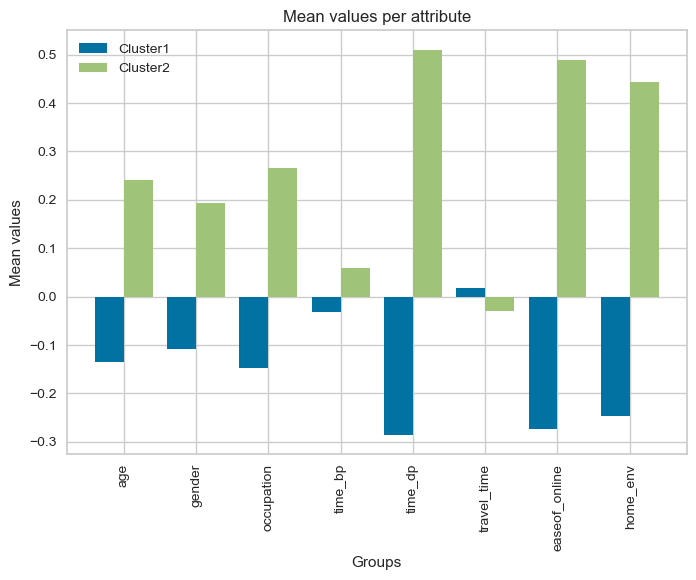

In [36]:
X = cluster1.keys()[:8]

  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, cluster1_mean_p1, 0.4, label = 'Cluster1')
plt.bar(X_axis + 0.2, cluster2_mean_p1, 0.4, label = 'Cluster2')
  
plt.xticks(X_axis, X, rotation='vertical')
plt.xlabel("Groups")
#plt.subplots_adjust(bottom=0.1)
plt.ylabel("Mean values")
plt.title("Mean values per attribute")
plt.legend()
plt.show()

In [37]:
cluster1_mean_p2 = cluster1_mean[8:]
cluster2_mean_p2 = cluster2_mean[8:]

In [38]:
cluster1_mean_p2

array([ 0.23677304,  0.36552551,  0.51286248,  0.55083829,  0.53473984,
        0.52058515,  0.15357357, -0.26734494])

In [39]:
cluster1.keys()[8:-1]

Index(['prod_inc', 'sleep_bal', 'new_skill', 'fam_connect', 'relaxed',
       'self_time', 'prefer', 'certaindays_hw'],
      dtype='object')

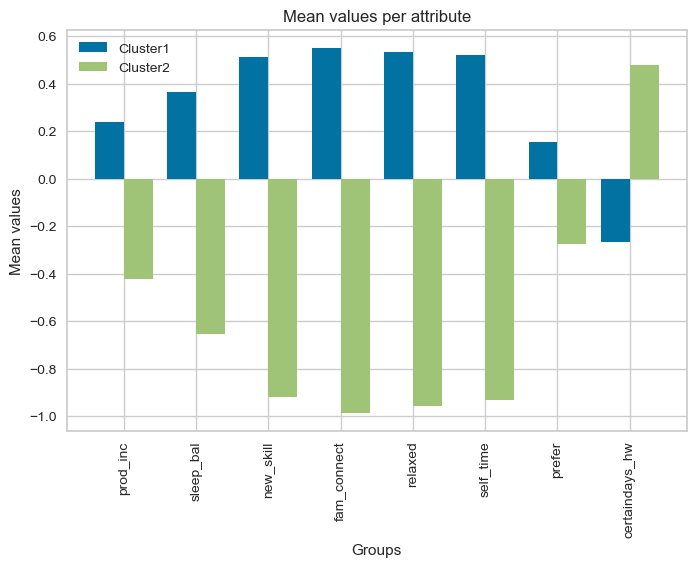

In [40]:
X = cluster1.keys()[8:-1]

  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, cluster1_mean_p2, 0.4, label = 'Cluster1')
plt.bar(X_axis + 0.2, cluster2_mean_p2, 0.4, label = 'Cluster2')
  
plt.xticks(X_axis, X, rotation='vertical')
plt.xlabel("Groups")
plt.subplots_adjust(bottom=0.15, wspace=0.05)
plt.ylabel("Mean values")
plt.title("Mean values per attribute")
plt.legend()
plt.show()

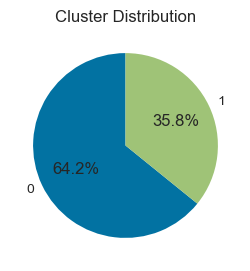

In [41]:
import matplotlib.pyplot as plt

# Count the number of data points in each cluster
cluster_counts = scaled_features_df['cluster'].value_counts()

# Plot a pie chart
plt.figure(figsize=(3, 3))
plt.pie(cluster_counts, labels=cluster_counts.index, autopct='%1.1f%%', startangle=90, )
plt.title('Cluster Distribution')
plt.show()
